In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Example DataFrame with categories and frequency columns
data = {
    'categories': ['A', 'B', 'C', 'D', 'E'],
    'frequency': [10, 15, 7, 20, 5]
}

df = pd.DataFrame(data)
df

,categories,frequency
0,A,10
1,B,15
2,C,7
3,D,20
4,E,5


/tmp/ipykernel_27/4042228807.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categories', y='frequency', data=df, palette='Blues')


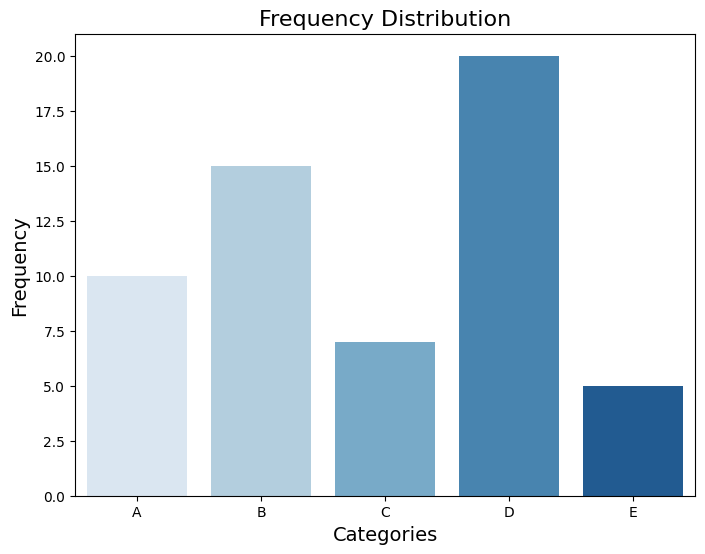

In [8]:
# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='categories', y='frequency', data=df, palette='Blues')

# Customize the plot
plt.title('Frequency Distribution', fontsize=16)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

/tmp/ipykernel_27/3292768352.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categories', y='frequency', data=df, palette=palette)
/tmp/ipykernel_27/3292768352.py:5: UserWarning: The palette list has more values (50) than needed (5), which may not be intended.
  sns.barplot(x='categories', y='frequency', data=df, palette=palette)


<Axes: xlabel='categories', ylabel='frequency'>

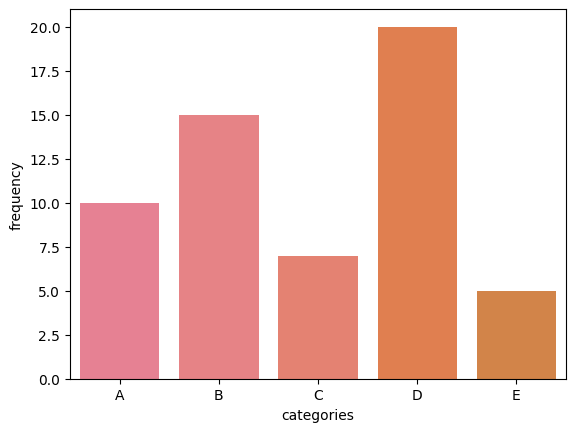

In [22]:
# Generate a palette with 50 distinct colors using 'husl'
palette = sns.color_palette("husl", 50)

# Apply this palette to your plot
sns.barplot(x='categories', y='frequency', data=df, palette=palette)

/tmp/ipykernel_27/907703428.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categories', y='frequency', data=df, palette=palette)


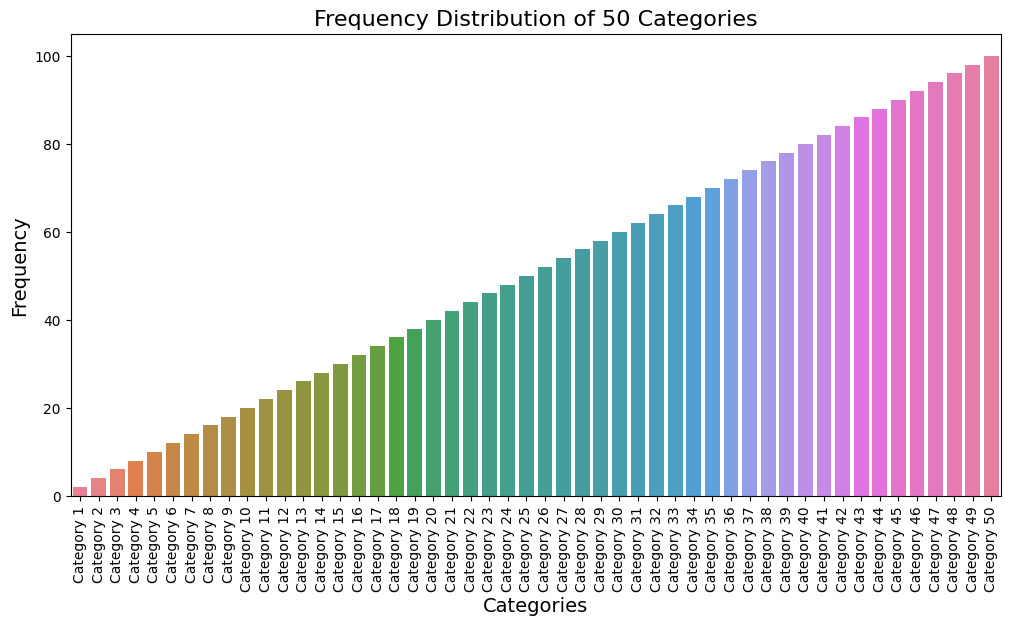

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example dataset with 50 categories
data = {
    'categories': [f'Category {i}' for i in range(1, 51)],
    'frequency': [i*2 for i in range(1, 51)]
}

df = pd.DataFrame(data)

# Generate a palette with 50 distinct colors using 'husl'
palette = sns.color_palette("husl", 50)

# Plot using the palette
plt.figure(figsize=(12, 6))
sns.barplot(x='categories', y='frequency', data=df, palette=palette)

# Customize plot
plt.title('Frequency Distribution of 50 Categories', fontsize=16)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_27/3239035364.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categories', y='frequency', data=df, palette="Spectral")


<Axes: xlabel='categories', ylabel='frequency'>

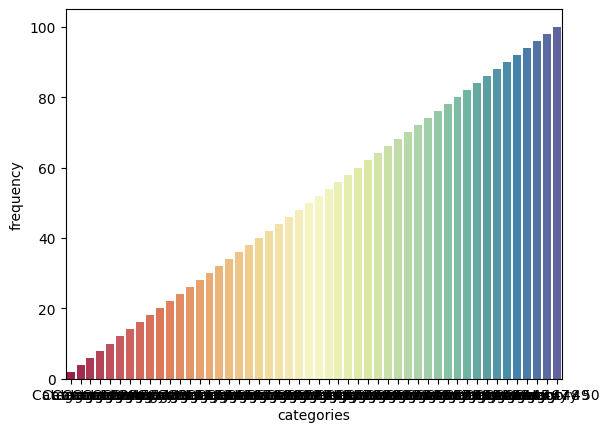

In [34]:
# Apply this palette to your plot
sns.barplot(x='categories', y='frequency', data=df, palette="Spectral")

/tmp/ipykernel_27/4032192308.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categories', y='frequency', data=df, palette="Spectral")


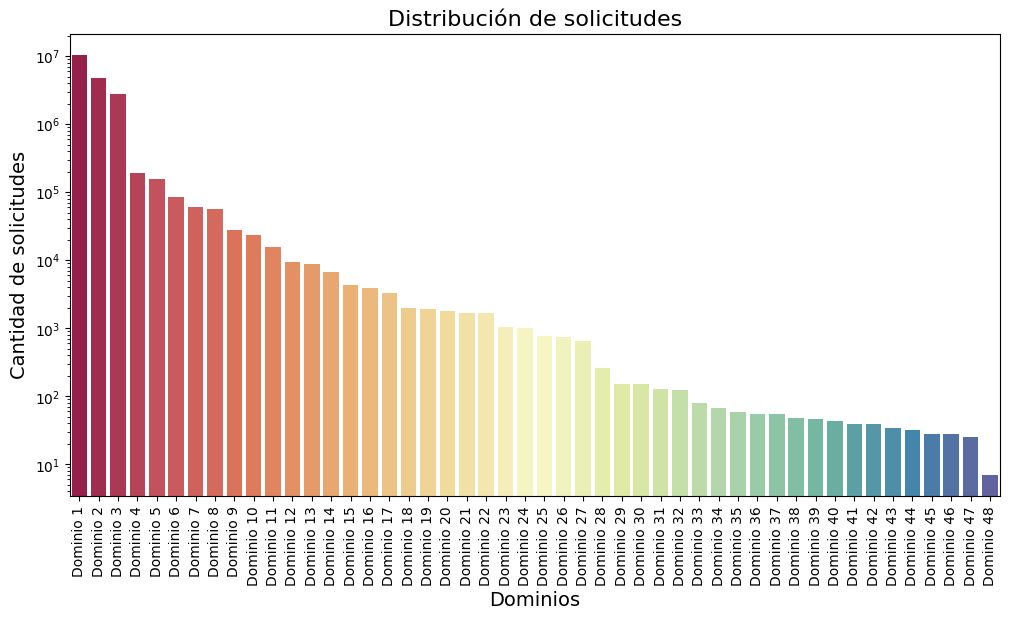

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

vals = [
    10424117,
    4831388,
    2749524,
    188809,
    156748,
    85680,
60830,
55657,
28071,
23649,
15519,
9364,
8709,
6713,
4296,
3837,
3259,
1953,
1901,
1783,
1685,
1650,
1050,
1002,
759,
734,
657,
261,
153,
150,
128,
125,
79,
67,
59,
55,
55,
48,
46,
43,
39,
39,
34,
32,
28,
28,
25,
7,
]
data = {
    'categories': [f'Dominio {i}' for i in range(1, 49)],
    'frequency': vals
}

df = pd.DataFrame(data)


# Plot using the palette
plt.figure(figsize=(12, 6))
sns.barplot(x='categories', y='frequency', data=df, palette="Spectral")

plt.yscale('log')

# Customize plot
plt.title('Distribución de solicitudes', fontsize=16)
plt.xlabel('Dominios', fontsize=14)
plt.ylabel('Cantidad de solicitudes', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [46]:
# Calculate total count
total_count = df['frequency'].sum()

# Transform counts into percentages
df['percentage'] = (df['frequency'] / total_count) * 100



    categories  frequency  percentage
0    Dominio 1   10424117   55.830987
1    Dominio 2    4831388   25.876644
2    Dominio 3    2749524   14.726297
3    Dominio 4     188809    1.011250
4    Dominio 5     156748    0.839534
5    Dominio 6      85680    0.458897
6    Dominio 7      60830    0.325802
7    Dominio 8      55657    0.298096
8    Dominio 9      28071    0.150347
9   Dominio 10      23649    0.126663
10  Dominio 11      15519    0.083119
11  Dominio 12       9364    0.050153
12  Dominio 13       8709    0.046645
13  Dominio 14       6713    0.035954
14  Dominio 15       4296    0.023009
15  Dominio 16       3837    0.020551
16  Dominio 17       3259    0.017455
17  Dominio 18       1953    0.010460
18  Dominio 19       1901    0.010182
19  Dominio 20       1783    0.009550
20  Dominio 21       1685    0.009025
21  Dominio 22       1650    0.008837
22  Dominio 23       1050    0.005624
23  Dominio 24       1002    0.005367
24  Dominio 25        759    0.004065
25  Dominio 

In [48]:
df

,categories,frequency,percentage
0,Dominio 1,10424117,55.830987
1,Dominio 2,4831388,25.876644
2,Dominio 3,2749524,14.726297
3,Dominio 4,188809,1.011250
4,Dominio 5,156748,0.839534
5,Dominio 6,85680,0.458897
6,Dominio 7,60830,0.325802
7,Dominio 8,55657,0.298096
8,Dominio 9,28071,0.150347
9,Dominio 10,23649,0.126663
